##Database creation and table import

(base) Karuns-MacBook-Air:~ karunparashar$ sqlite3 playstore.db

.import /Users/karunparashar/googleplaystore_user_reviews.csv UR;

.import /Users/karunparashar/googleplaystore.csv play;


##data pre-processing: 
1. NA removal from UR table
    select count(*) from UR where sentiment = "nan";
    delete from UR where sentiment = "nan";
    
2. Unclassified type from Installs column removed
    select count(*) from play where installs like "Free";
    delete from play where installs like "Free";
    delete from play where type like "NaN";
    
3. NA ratings are replaced by the mean of the column
    update play set rating = (select avg(rating) from play where rating not like 'NaN') where rating like 'NaN';
    
4. Delete invalid cateogry from Play table
    delete from play where Category = 1.9;

##Table creation    
1.Table creation on the basis of required columns and order

Query used-- create table trending_apps as select distinct app,category,genres,type,rating,reviews,installs, "Content Rating" from play order by rating desc, reviews desc;
    
2.Updated the table have data in upper case for normalization   

Query Used-- update trending_apps set app = upper(app), category = upper(category), "Content Rating" = upper("Content Rating"), genres = upper(genres);
Query Used-- update ur set app = upper(app), Translated_Review =upper(Translated_Review),sentiment = upper(sentiment);
    
3.Table creation for pie chart and histogram visualization

Query used-- create table app_cat as select  category,count(*) as NumberOfApps from play group by category order by NumberOfApps desc;



The datatype of 'Installs' column is changed to numeric and that of 'Reviews' to integer

In [10]:
import pandas as pd  
import numpy as np
import sqlite3  
conn = sqlite3.connect("playstore.db")  
df_t = pd.read_sql_query('''select * from trending_apps''',conn)
df_t['Installs'] = df_t['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df_t['Installs'] = df_t['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df_t['Installs'] = df_t['Installs'].apply(lambda x: int(x))
df_t['Reviews'] = df_t['Reviews'].apply(lambda x: int(x))
df_t

,App,Category,Genres,Type,Rating,Reviews,Installs,Content Rating
0,MASTER E.K,FAMILY,EDUCATION,Free,5.0,90,1000,EVERYONE
1,AJ RETAILS,SHOPPING,SHOPPING,Free,5.0,9,10,EVERYONE
2,DW TIMER,TOOLS,TOOLS,Free,5.0,9,100,EVERYONE
3,EB SCANNER,PRODUCTIVITY,PRODUCTIVITY,Free,5.0,9,50,EVERYONE
4,AXE CHAMPS! WARS,GAME,ARCADE,Free,5.0,8,50,EVERYONE
5,BK AROGYAM TASK TRACK,BUSINESS,BUSINESS,Free,5.0,8,100,EVERYONE
6,BV SRIDHARA MAHARAJ,FAMILY,ENTERTAINMENT,Free,5.0,8,100,EVERYONE
7,YAZDANI CD CENTER ELLAHABAD OFFICIAL APP,FAMILY,ENTERTAINMENT,Free,5.0,8,500,EVERYONE
8,CG JOBS,FAMILY,EDUCATION,Free,5.0,8,10,EVERYONE
9,211:CK,GAME,ARCADE,Paid,5.0,8,10,TEEN


The following provides the distribution of rating values for all the apps as per the new table created

Text(0.5, 1.0, 'Distribution of Ratings')

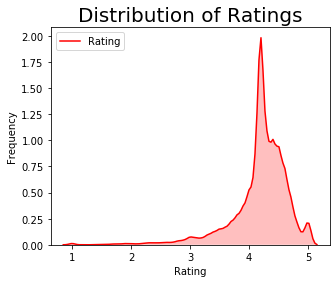

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 5,4
g = sns.kdeplot(df_t.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings',size = 20)

The following provides the distribution of number of reviews for all the apps in the table named 'trending_apps'

Text(0.5, 1.0, 'Distribution of Reviews')

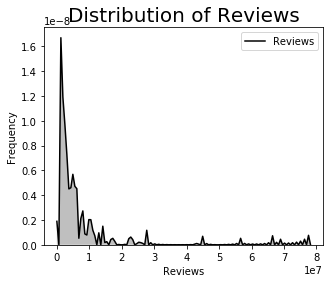

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 5,4
g = sns.kdeplot(df_t.Reviews, color="Black", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reviews',size = 20)

This cell displays the Highest N('User defined') categories on the basis of number of apps along with their respective count using a bar chart

Enter number of categories
11


Text(0.5, 1.0, 'Category-wise App Distribution')

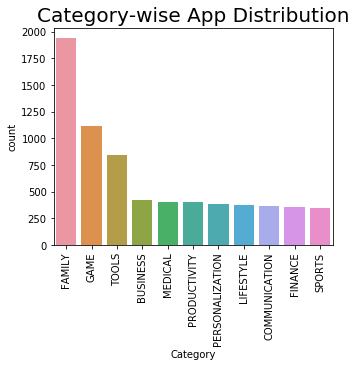

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from pylab import rcParams
conn = sqlite3.connect("playstore.db")  
new_input = int(input('Enter number of categories\n'))
dfx = pd.read_sql_query('''select count(*) from app_cat ''',conn)
if new_input>=1 and new_input<= dfx['count(*)'][0]:
    df_1 = pd.read_sql_query("select * from app_cat limit {}".format(new_input), conn)
    # df1
    em = []
    for i in df_1['Category']:
        em.append(i)
    New_df = df_t[df_t['Category'].isin(em)] 
ax = sns.countplot(x="Category", data=New_df,order = New_df['Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Category-wise App Distribution', size=20)

This cell finds the percentage quota of each category from the table named 'app_cat'

In [15]:
conn = sqlite3.connect("playstore.db")  
df2 = pd.read_sql_query("select * from app_cat", conn)
# ax=sns.barplot(x ="Category",y = "NumberOfApps" )
test_df = df2[:10]
sum_df1 = sum(test_df["NumberOfApps"])
sum_df1
test_df["NumberOfApps"] = test_df["NumberOfApps"]/sum_df1


This cell provides the category wise app distribution with the help of piechart and states their respective percentage as well.
It can be deduced that among all the categories the maximum number of apps are in the 'FAMILY' category, followed by 'GAME' and 'TOOLS' categories

Text(0.5, 1, 'Top 10 Category-wise App Distribution')

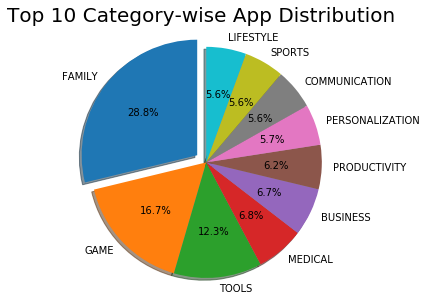

In [16]:
test_df
labels, sizes = [], []

for i in test_df["Category"]:
    labels.append(i)
    
for i in test_df["NumberOfApps"]:
    sizes.append(i)

explode = (0.1,0,0,0,0,0,0,0,0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Top 10 Category-wise App Distribution', size=20)

This cell provides the information about the distribution of the column 'Installs' 

Text(0.5, 1.0, 'Distribution of Installs')

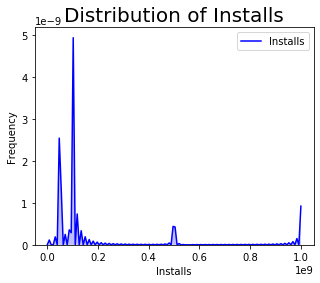

In [9]:
rcParams['figure.figsize'] = 5,4
g = sns.kdeplot(df_t.Installs, color="Blue", shade = True)
g.set_xlabel("Installs")
g.set_ylabel("Frequency")
plt.title('Distribution of Installs',size = 20)

This cell helps us to make the interaction experience more dynamic by the help of generating a drop down which selects which category and generate its respective scatter hover plot

In [18]:
import plotly.graph_objects as go
import ipywidgets as widgets
category_dd = widgets.Dropdown(options = list(df_t["Category"].unique()), 
                               description = "Select Category", disabled =False,)
category_dd

Dropdown(description='Select Category', options=('FAMILY', 'SHOPPING', 'TOOLS', 'PRODUCTIVITY', 'GAME', 'BUSIN…

Based on the category choosen from the dropdown, the data is populated in the below query which gives the number of apps in the chosen category and the associated scatterplot which provides the information like the name of the app, its category,genre and the content rating associated with that app

In [21]:
selected_category = str(category_dd).split("value")[1][2:-2]
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import plotly_express as px
new_data = df_t.query("Category == '{}'".format(selected_category))
print('The total number of apps in the selected category is',len(new_data))
imp = int(input("Select the number of Apps to be displayed\n"))
if imp>=1 and imp<= len(new_data):
    new_df = new_data[:imp]
    pt = px.scatter(new_df,x = "Rating",y = "Reviews",hover_name='App',hover_data=['Category','Content Rating','Genres'])
    pt2 = px.scatter(new_df,x = "Rating",y = "Installs",hover_name='App',hover_data=['Category','Content Rating','Genres'])
    pt3 = px.scatter(new_df,x = "Reviews",y = "Installs",hover_name='App',hover_data=['Category','Content Rating','Genres'])
    pt.show()
    pt2.show()
    pt3.show()
else:
    print('invalid input')

The total number of apps in the selected category is 360
Select the number of Apps to be displayed
211


In [11]:
# import pandas as pd
# import plotly_express as px
# new_data = df_t.query("Category == 'SHOPPING'")
# imp = int(input("Select the number of Apps to be displayed\n"))
# if imp>=1 and imp<= len(new_data):
#     new_df = new_data[:imp]
#     pt = px.scatter(new_df,x = "Rating",y = "Installs",hover_name='App',hover_data=['Genres','Content Rating'])
#     pt.show()
# else:
#     print('invalid input')

Select the number of Apps to be displayed
10


#################This cell can be removed and rather the plots in the above cell can be utilised to create marginals, this will reduce redundancy because this is only for one app

In [ ]:
import pandas as pd
import plotly_express as px
new_data = df_t.query("Category == 'SHOPPING'")
imp = int(input("Select the number of Apps to be displayed\n"))
if imp>=1 and imp<= len(new_data):
    new_df = new_data[:imp]
    pt = px.scatter(new_df,x = "Installs",y = "Reviews",hover_name='App',hover_data=['Genres','Content Rating'])
    pt.show()
else:
    print('invalid input')

In [42]:
import plotly_express as px
new_data = df_t.query("Category == 'SOCIAL'")
px.scatter(new_data,x = "Rating",y = "Installs",hover_name='App',hover_data=['Genres'],marginal_x = "histogram",color = 'Content Rating')

The following cell provides the information about the overall distribution of paid apps V/S free apps and this clearly tells us that the majority of the apps are free in this database

([<matplotlib.patches.Wedge at 0x1a3c0f0320>,
 [Text(-0.2760435355165686, -1.1678184647022471, 'Free'),
  Text(0.2760435355165687, 1.167818464702247, 'Paid')],
 [Text(-0.16102539571799834, -0.6812274377429773, '92.6%'),
  Text(0.1610253957179984, 0.6812274377429772, '7.4%')])

(-1.1308086954105998,
 1.0792174071151421,
 -1.2147201349397725,
 1.2074152692171696)

Text(0.5, 1, 'Paid V/S Free')

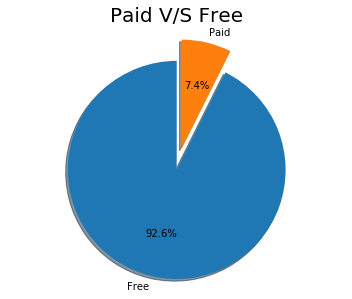

In [61]:
import pandas as pd  
import numpy as np
import sqlite3  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from pylab import rcParams
conn = sqlite3.connect("playstore.db")  
df_p = pd.read_sql_query('''select type, count(*) as no_of_users from trending_apps group by type''',conn)
percent_free = df_p['no_of_users'][0]/sum(df_p['no_of_users'])
percent_paid = 1-percent_free
labels, sizes = ['Free','Paid'], [percent_free,percent_paid]
explode = (0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Paid V/S Free', size=20)


This cell again helps us to select the category using a drop-down for its subsequent usage in the next cell

In [60]:
import plotly.graph_objects as go
import ipywidgets as widgets
category_dd = widgets.Dropdown(options = list(df_t["Category"].unique()), 
                               description = "Select Category", disabled =False,)
category_dd


Dropdown(description='Select Category', options=('FAMILY', 'SHOPPING', 'TOOLS', 'PRODUCTIVITY', 'GAME', 'BUSIN…

This cell uses the selection from the above cell and generates the distribution of free/paid apps belonging to that particular category

'SOCIAL'

([<matplotlib.patches.Wedge at 0x1a45aa3d68>,
 [Text(-0.04038430437128869, -1.199320269136, 'Free'),
  Text(0.04038432893439045, 1.1993202683088946, 'Paid')],
 [Text(-0.023557510883251736, -0.6996034903293332, '98.9%'),
  Text(0.023557525211727763, 0.6996034898468552, '1.1%')])

(-1.1057762086776917,
 1.1022826114767983,
 -1.2139332139122692,
 1.2101279542450105)

Text(0.5, 1, 'Paid V/S Free')

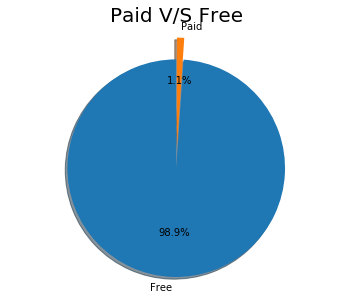

In [73]:
import pandas as pd  
import numpy as np
import sqlite3  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from pylab import rcParams
selected_category = str(category_dd).split("value")[1][2:-2]
selected_category
conn = sqlite3.connect("playstore.db")  
df_p = pd.read_sql_query('''select type, count(*) as no_of_users from trending_apps where category = '{}' group by type'''.format(selected_category),conn)
percent_free = df_p['no_of_users'][0]/sum(df_p['no_of_users'])
percent_paid = 1-percent_free
labels, sizes = ['Free','Paid'], [percent_free,percent_paid]
explode = (0.1,0.1) 
#colors = sns.set_color_codes("Spectral")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Paid V/S Free', size=20)

In [74]:
# import pandas as pd  
# import numpy as np
# import sqlite3  
# import matplotlib.pyplot as plt 
# import seaborn as sns 
# import warnings
# from pylab import rcParams
# data_review = pd.read_sql_query('''select distinct play.app from play join UR on UR.app = play.app ''',conn)
# data_review

In [ ]:
# df_play = pd.read_sql_query("""SELECT count(DISTINCT APP) FROM Play""", conn)
# df_play

In [ ]:
# df_ur = pd.read_sql_query("""SELECT count(distinct App) FROM UR""", conn)
# df_ur

We now address the sentiment polarity and sentiment subjectivity associated with the Apps:
Here, we create a table named 'common_apps' to get the matching records from 'trending_apps' and 'UR', and obtain the average values of Polatity and subjectivity score along with their respective average rating and reviews

In [ ]:
c = conn.cursor()
c.execute("""DROP TABLE IF EXISTS Common_Apps""")
c.execute("""CREATE TABLE IF NOT EXISTS Common_Apps as SELECT ta.app,ta.installs,ta.category,u.Sentiment,ta.type,avg(ta.rating) avg_rating,avg(ta.reviews) Avg_number_of_reviews,avg(u.sentiment_polarity) Avg_polarity_score, avg(u.sentiment_subjectivity) Avg_subjectivity_score FROM trending_apps ta INNER JOIN UR u ON ta.App = u.App group by ta.app,ta.installs,ta.category,u.Sentiment,ta.type""")
df_common_apps = pd.read_sql_query("""SELECT * FROM Common_apps""", conn)
df_common_apps

Here we bin the ratings into 5 parts so as to better visualise the polarity and subjectivity score for the apps belonging to a particular rating

In [66]:
df_j = pd.read_sql_query("""select Avg_rating, avg(Avg_Polarity_Score) Avg_Polarity_Score, avg(Avg_Subjectivity_Score)Avg_Subjectivity_Score from
(select case
    when avg_rating > 2.5 and avg_rating <= 3.0 then '2.5-3.0'
    when avg_rating > 3.0 and avg_rating <= 3.5 then '3.0-3.5'
    when avg_rating > 3.5 and avg_rating <= 4.0 then '3.5-4.0'
    when avg_rating > 4.0 and avg_rating <= 4.5 then '4.0-4.5'
    else '4.5-5.0'
  end Avg_rating,
  avg_polarity_score Avg_Polarity_Score,
  avg_subjectivity_score Avg_Subjectivity_Score
  from Common_apps)
  group by Avg_rating""", conn)
df_j

,Avg_rating,Avg_Polarity_Score,Avg_Subjectivity_Score
0,2.5-3.0,-0.027737,0.377148
1,3.0-3.5,0.013961,0.390615
2,3.5-4.0,0.029281,0.415569
3,4.0-4.5,0.049632,0.413888
4,4.5-5.0,0.058392,0.432733


Plot the average Ploarity and Subjectivity scores over the entire range of rating
This plot indicates a linear relation between the average rating and the polarity/subjectivity score which is natural, since the better polarity score an app has ,it is very highly likely rated relatively better

Text(0.5, 0, 'Average User Rating range')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Rating V/S Sentiment Scores')

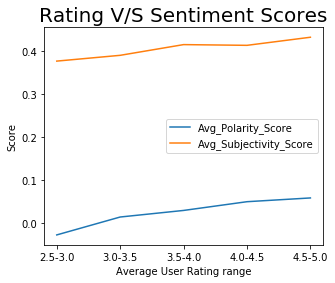

In [67]:
import matplotlib.pyplot as plt
import numpy as np
x = df_j['Avg_rating']
x = list(x)
y1 = df_j['Avg_Polarity_Score']
y1 = list(y1)
y2 = df_j['Avg_Subjectivity_Score']
y2 = list(y2)
plt.plot( x, y1,label = 'Avg_Polarity_Score')
plt.plot( x, y2,label = 'Avg_Subjectivity_Score')
plt.legend()
plt.xlabel("Average User Rating range")
plt.ylabel("Score")
plt.title('Rating V/S Sentiment Scores', size=20)

The following cell is a dropdown which helps us to plot the sentiment polarity for the associated category in the cells to follow

In [22]:
import plotly.graph_objects as go
import ipywidgets as widgets
category_dd = widgets.Dropdown(options = list(df_t["Category"].unique()), 
                               description = "Select Category", disabled = False,)
category_dd

Dropdown(description='Select Category', options=('FAMILY', 'SHOPPING', 'TOOLS', 'PRODUCTIVITY', 'GAME', 'BUSIN…

This cell extracts the selection as a dataframe which has the number of apps for a particular sentiment along with whether those apps are coming in the free/paid category

In [69]:
selected_category = str(category_dd).split("value")[1][2:-2]
df1 = pd.read_sql_query("""select type, sentiment Sentiment, count(*) App_count from common_apps where category = '{}' group by type, sentiment order by count(*) desc""".format(selected_category), conn)
df1

,Type,Sentiment,App_count
0,Free,POSITIVE,81
1,Free,NEGATIVE,75
2,Free,NEUTRAL,64
3,Paid,NEGATIVE,1
4,Paid,NEUTRAL,1
5,Paid,POSITIVE,1


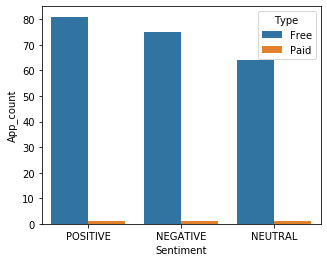

In [70]:
sns.barplot(x='Sentiment',y='App_count',hue='Type',data=df1)

In [52]:
conn = sqlite3.connect('PLAYSTORE.db')
conn_cursor = conn.cursor()
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name)


('UR',)
('app_cat',)
('play',)
('trending_apps',)
('Common_Apps',)
('sentiment_data',)


In [56]:
# df1 = pd.read_sql_query("""select distinct * from sentiment_data""".format(selected_category), conn)
# df1

,App,Installs,Category,Sentiment,Type,Sentiment_Polarity,Sentiment_Subjectivity
0,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,NEGATIVE,Free,-0.05,0.55
1,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,NEUTRAL,Free,0.0,0.0
2,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.016666666666666677,0.18333333333333335
3,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.05000000000000002,0.5
4,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.1,0.6
5,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.12321428571428572,0.42857142857142855
6,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.125,0.175
7,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.15000000000000002,0.825
8,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.17333333333333334,0.8707407407407408
9,CDL PRACTICE TEST 2018 EDITION,"100,000+",AUTO_AND_VEHICLES,POSITIVE,Free,0.175,0.6000000000000001


<Figure size 1440x1296 with 0 Axes>

Text(0.5, 0, 'Sentiment Polarity')

Text(0, 0.5, 'Sentiment Subjectivity')

Text(0.5, 1.0, 'Sentiment Analysis')

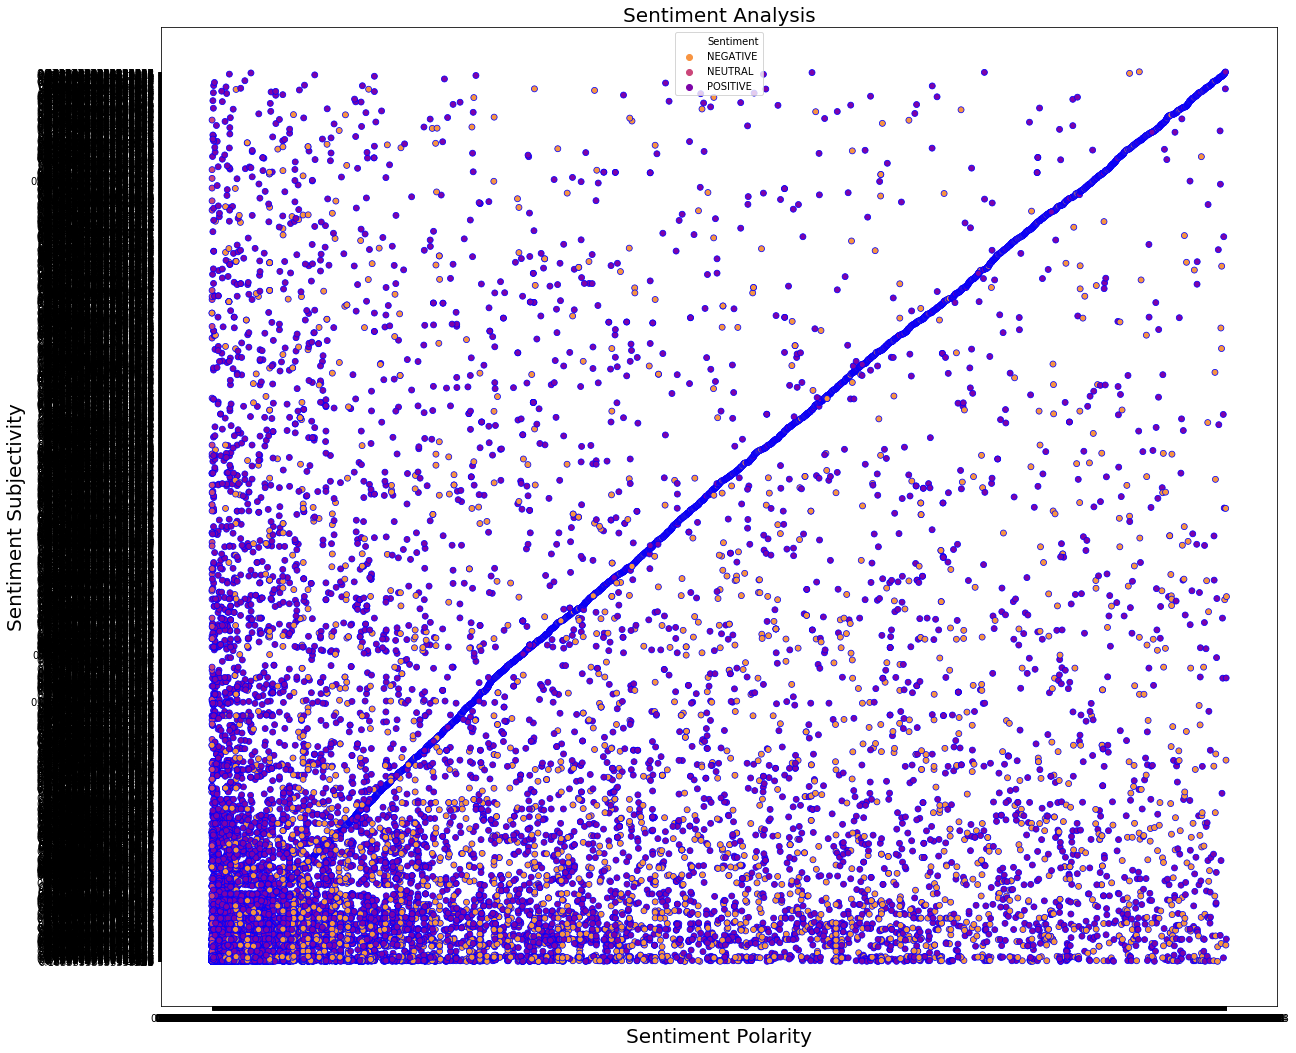

In [57]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,18))
# j = sns.scatterplot(df1['Sentiment_Polarity'],df1['Sentiment_Subjectivity'],hue=df1['Sentiment'], edgecolor='blue',palette="plasma_r")
# plt.xlabel('Sentiment Polarity', fontsize=20)
# plt.ylabel('Sentiment Subjectivity', fontsize=20)
# plt.title("Sentiment Analysis", fontsize=20)
# plt.show()

In [ ]:
# c = conn.cursor()
# c.execute("""DROP TABLE IF EXISTS Common_Apps""")
# c.execute("""CREATE TABLE IF NOT EXISTS Common_Apps as SELECT ta.app,ta.category,u.Sentiment,u.Sentiment_Polarity, u.Sentiment_Subjectivity FROM trending_apps ta INNER JOIN UR u ON ta.App = u.App""")
# df_common_apps = pd.read_sql_query("""SELECT * FROM Common_apps""", conn)
# df_common_apps